# Análise de Vendas de Supermercado


**Introdução:**

Neste projeto, mergulhamos profundamente no oceano de dados gerados por um supermercado líder, com o intuito de desvendar padrões, tendências e oportunidades ocultas que residem nas transações diárias. Este estudo abrangente é alimentado por um conjunto de dados robusto, originário do Kaggle, que captura a essência das operações de vendas de uma cadeia de supermercados amplamente reconhecida. Através deste espectro de dados, que inclui desde detalhes de pedidos e preferências de clientes até a eficácia de diferentes modos de envio, nos propomos a desbloquear insights que não apenas iluminam o passado e presente das vendas, mas também pavimentam o caminho para estratégias de negócios inovadoras.

# Bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

**Pandas**

**Descrição:** Uma biblioteca de código aberto, licenciada por BSD, que fornece estruturas de dados de alto desempenho e fáceis de usar, além de ferramentas de análise de dados para a linguagem de programação Python. É a ferramenta mais popular e indispensável para a análise de dados em Python, especialmente adequada para dados tabulares (como são os dados em SQL, CSV, entre outros formatos).  
**Uso no Projeto:** É utilizado para carregar os dados de vendas do supermercado a partir de um arquivo CSV para um DataFrame, que é uma estrutura de dados bidimensional com linhas e colunas, facilitando a manipulação, filtragem, agregação e visualização dos dados.

**Matplotlib**

**Descrição:** Uma biblioteca de plotagem para a linguagem de programação Python e sua extensão matemática NumPy. Ela oferece uma maneira de produzir figuras de qualidade em uma variedade de formatos e ambientes interativos em todas as plataformas. Matplotlib pode ser usado para criar histogramas, espectros de potência, gráficos de barras, gráficos de erro, scatterplots, etc.  
**Uso no Projeto:** É utilizado para a criação de gráficos e visualizações estáticas, animadas e interativas dentro do projeto. Por exemplo, você pode querer mostrar a tendência de vendas ao longo do tempo, comparar as vendas entre diferentes categorias de produtos, ou visualizar a distribuição de vendas por região.

**Seaborn**

**Descrição:** Uma biblioteca de visualização de dados Python baseada no Matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos. Seaborn vem com uma variedade de tipos de gráficos e estilos, e trabalha bem com DataFrames do Pandas, o que facilita a visualização de dados diretamente de um DataFrame.  
**Uso no Projeto:** É usado para tornar mais simples a criação de visualizações de dados complexas. Ele é particularmente útil para plotar gráficos que mostram as relações entre múltiplas variáveis, distribuições de dados, ou para aprimorar visualmente os gráficos produzidos com Matplotlib.

**Warnings**

 Permite gerenciar avisos durante a execução de programas. Ele é útil para controlar avisos emitidos pelo código ou bibliotecas usadas, permitindo filtrar, ignorar ou modificar avisos conforme necessário. Com warnings, é possível focar nos avisos importantes, suprimindo os menos relevantes para deixar a saída do Grafico mais limpa e focada. Ajudando a manter a clareza do código e a eficiência da depuração.  
**Uso no Projeto:** Essa abordagem é utilizada para evitar que avisos sobre depreciações ou mudanças futuras na biblioteca **matplotlib**, **seaborn** ou quaisquer outras bibliotecas usadas no bloco afetem a leitura ou a apresentação dos resultados, permitindo que o gráfico seja gerado sem interrupções por mensagens de aviso. Isso é particularmente útil quando você está ciente dos avisos, mas decide que eles não são relevantes para a execução atual do seu projeto, possivelmente porque você já garantiu a compatibilidade ou planeja lidar com essas mudanças futuras em um momento posterior.

**Carregando e Visualizando os Dados**

In [ ]:
dados = pd.read_csv('/content/Dados/superstore_final_dataset.csv', encoding='ISO-8859-1')

Este comando utiliza o Pandas para carregar os dados do supermercado a partir de um arquivo CSV. O parâmetro encoding='ISO-8859-1' é usado para garantir que caracteres especiais ou acentuados sejam corretamente interpretados, o que é comum em conjuntos de dados que contêm textos em idiomas além do inglês.

In [ ]:
dados.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


Após carregar o dataset, este comando exibe as primeiras cinco linhas do DataFrame dados. É uma maneira rápida de verificar se os dados foram carregados corretamente e de obter uma visão preliminar da estrutura dos dados, incluindo nomes de colunas e tipos de dados das primeiras entradas.

Essas ferramentas e técnicas são fundamentais para qualquer projeto de análise de dados, permitindo uma compreensão profunda e insights a partir de conjuntos de dados complexos.

# Colunas do supestore_final_dataset.csv

**Row_ID:** Um identificador único para cada linha do dataset.  
**Order_ID:** Um identificador único para cada pedido. Várias linhas podem compartilhar o mesmo **Order_ID** se o pedido incluir múltiplos itens.  
**Order_Date:** A data em que o pedido foi feito.  
**Ship_Date:** A data em que o pedido foi enviado ao cliente.  
**Ship_Mode:** O modo de envio utilizado para o pedido, indicando a rapidez com que o pedido foi entregue (por exemplo, "Second Class", "Standard Class").  
**Customer_ID:** Um identificador único para cada cliente.  
**Customer_Name:** O nome do cliente que fez o pedido.  
**Segment:** O segmento de mercado do cliente (por exemplo, "Consumer", "Corporate").  
**Country:** O país onde o pedido foi feito. Neste dataset, todos os pedidos parecem ser dos Estados Unidos.  
**City:** A cidade onde o pedido foi feito.  
**State:** O estado onde o pedido foi feito.  
**Postal_Code:** O código postal para o endereço de entrega do pedido.
Region: A região geográfica onde o pedido foi feito (por exemplo, "South", "West").  
**Product_ID:** Um identificador único para cada produto.  
**Category:** A categoria geral do produto (por exemplo, "Furniture", "Office Supplies").  
**Sub_Category:** A subcategoria do produto, que oferece uma especificação mais detalhada dentro da categoria (por exemplo, "Bookcases", "Chairs" para a categoria "Furniture").  
**Product_Name:** O nome do produto.  
**Sales:** O valor total de vendas para o item no pedido.  

# Análise de Outliers e Distribuição de Vendas

A análise de outliers e da distribuição das vendas é crucial para entender como os valores de vendas se distribuem e para identificar transações excepcionais que podem influenciar significativamente a estratégia de negócios. Utilizando um histograma com escala logarítmica, podemos visualizar melhor a distribuição das vendas, especialmente quando há uma grande variação nos valores, com muitos valores pequenos e alguns muito grandes.

A seguir, apresentamos o código utilizado para gerar o histograma, juntamente com o gráfico resultante:



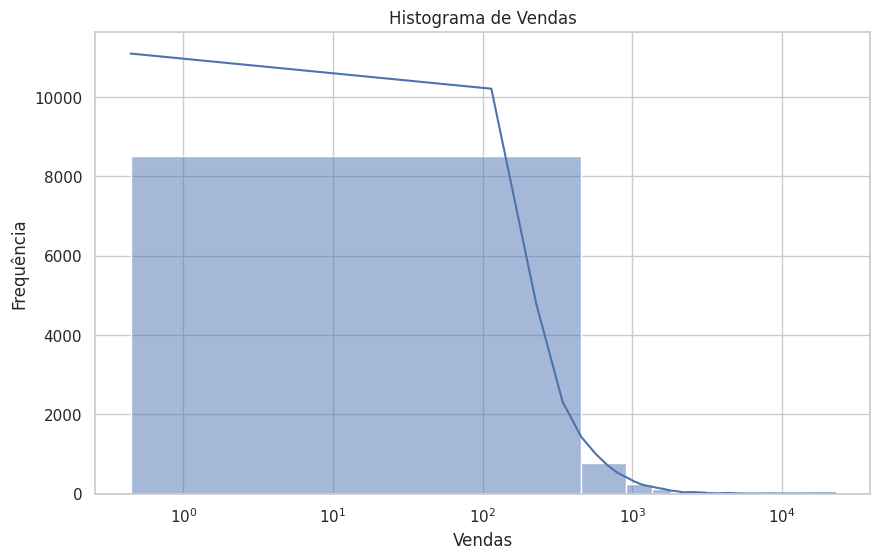

In [ ]:
# Estilo dos gráficos
sns.set(style="whitegrid")

# Distribuição de Vendas
plt.figure(figsize=(10, 6))
sns.histplot(dados['Sales'], bins=50, kde=True)
plt.title('Histograma de Vendas')
plt.xlabel('Vendas')
plt.ylabel('Frequência')
plt.xscale('log')  # Escala logarítmica devido à ampla distribuição
plt.show()

O histograma de vendas com escala logarítmica revela como as vendas estão distribuídas entre diferentes valores. A utilização da escala logarítmica nos permite visualizar melhor a distribuição das vendas, especialmente quando há uma grande variação nos valores de vendas, com muitos valores pequenos e alguns muito grandes. A distribuição mostra uma tendência de que a maioria das vendas está concentrada em valores mais baixos, com uma frequência decrescente à medida que o valor das vendas aumenta. Isso é típico de muitos contextos de vendas, onde transações de menor valor são mais comuns do que grandes vendas.

**Descoberta e Impacto**

A análise dos dados da superstore revela uma descoberta crucial: a predominância de vendas de menor valor, indicando que a loja atende principalmente a transações de pequeno e médio porte. Esta descoberta tem implicações significativas para a estratégia de negócios da superstore. Primeiramente, sugere que a loja tem uma base de clientes diversificada que prefere itens mais acessíveis ou faz compras menos volumosas. Isso pode ser reflexo de uma estratégia de precificação competitiva ou de um mix de produtos que atende a necessidades cotidianas ao invés de grandes investimentos.

O impacto desta descoberta pode ser vasto. Para otimizar as receitas, a superstore pode considerar estratégias como:

**Aumentar o Mix de Produtos de Baixo Custo:** Expandir a linha de produtos acessíveis para atrair mais clientes que procuram pequenas compras.  
**Programas de Fidelidade:** Incentivar compras repetidas através de programas de fidelidade, oferecendo descontos ou benefícios para clientes frequentes.  
**Promoções Direcionadas:** Utilizar análises de dados para identificar padrões de compra e desenvolver promoções direcionadas que incentivem compras maiores ou mais frequentes.  
**Otimização de Estoque:** Manter um estoque adequado de itens de venda rápida para evitar rupturas de estoque, garantindo a satisfação do cliente.  
**Marketing Digital:** Empregar estratégias de marketing digital para alcançar um público mais amplo, com ênfase em produtos populares ou em promoção.

Em resumo, a descoberta de que a superstore realiza predominantemente vendas de menor valor oferece uma oportunidade para revisar e adaptar as estratégias de marketing, vendas e operações para atender melhor às necessidades de sua base de clientes e maximizar o potencial de receita.

**Distribuição de Vendas**

No contexto da análise de dados de vendas, é essencial identificar e entender a distribuição das transações para detectar quaisquer anomalias ou outliers. Os outliers são pontos de dados que se desviam significativamente da maioria das observações, indicando vendas excepcionalmente altas ou baixas. Detectar esses pontos pode fornecer insights valiosos sobre transações incomuns que podem ser indicativas de oportunidades de mercado específicas ou de outras circunstâncias especiais.

Para visualizar a distribuição de vendas e identificar esses outliers, utilizamos um boxplot. Este gráfico é eficaz para resumir a distribuição de um conjunto de dados, mostrando a mediana, os quartis e destacando os outliers.

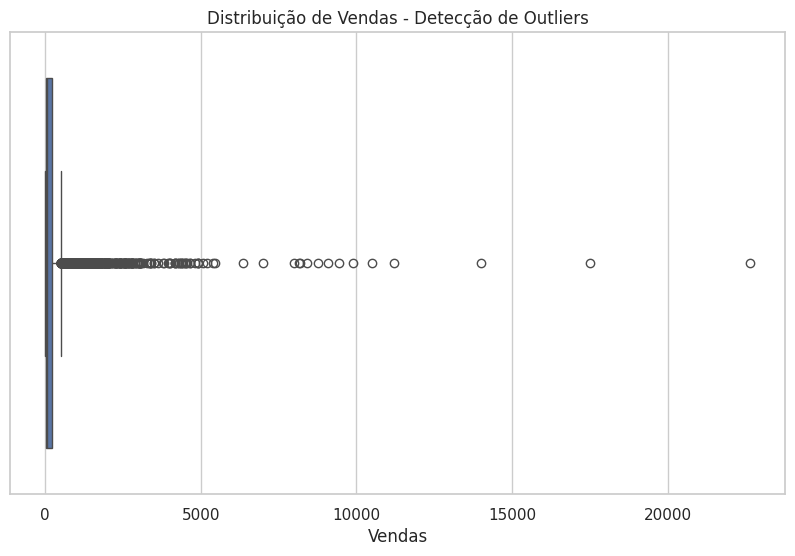

In [ ]:
# Estilo dos gráficos
sns.set(style="whitegrid")

# Análise de Outliers de Vendas
plt.figure(figsize=(10, 6))
sns.boxplot(x=dados['Sales'])
plt.title('Distribuição de Vendas - Detecção de Outliers')
plt.xlabel('Vendas')
plt.show()

A análise da distribuição de vendas através do boxplot revela a presença de outliers significativos no conjunto de dados. Os outliers são aqueles pontos de dados que se desviam notavelmente dos outros, indicando vendas excepcionalmente altas em comparação com a maioria das transações. O boxplot mostra que, enquanto a maioria das vendas se concentra em valores mais baixos, há um número substancial de vendas que se destaca por seu alto valor, representado pelos pontos fora do "bigode" do gráfico.

**Descoberta e Impacto**

A identificação de outliers nas vendas é uma descoberta importante, pois destaca transações que estão fora do padrão normal de negócios. Essas vendas excepcionais podem ser indicativas de oportunidades de mercado específicas, eficácia de campanhas de marketing pontuais, ou a preferência de clientes por produtos de alto valor em determinadas circunstâncias.

O impacto dessa descoberta é multifacetado e sugere várias ações estratégicas:

**Análise Detalhada:** Realizar uma análise detalhada dos outliers para entender as circunstâncias que levam a vendas excepcionalmente altas. Isso pode incluir a análise do tipo de produto vendido, o perfil do cliente, a época do ano, e as campanhas de marketing em vigor no momento da venda.  
**Segmentação de Mercado:** Utilizar os insights da análise de outliers para segmentar o mercado de forma mais eficaz, identificando nichos de clientes que têm maior probabilidade de realizar compras de alto valor.  
**Personalização de Ofertas:** Desenvolver ofertas e promoções personalizadas para clientes com potencial de compra elevado, incentivando-os a realizar transações de maior valor.  
**Gestão de Estoque e Logística:** Ajustar a gestão de estoque e a logística para suportar a demanda por produtos de alto valor, garantindo que a superstore possa atender a essas vendas sem problemas.
**Feedback de Produto:** Coletar feedback dos clientes que realizam compras de alto valor para melhorar a oferta de produtos e serviços, garantindo a satisfação e fidelização desses clientes.

Em resumo, a descoberta de outliers nas vendas oferece uma oportunidade valiosa para a superstore entender melhor os padrões de compra de seus clientes e adaptar suas estratégias de negócios para maximizar o potencial de vendas. Identificar e analisar essas vendas excepcionais pode revelar insights sobre preferências de produtos, eficácia de estratégias de marketing, e oportunidades de crescimento. ​

# Análise Categórica

A análise categórica das vendas por categoria é fundamental para entender como as vendas se distribuem entre diferentes tipos de produtos. Esta análise oferece insights sobre variações nas vendas e a presença de outliers, que são vendas excepcionalmente altas dentro de cada categoria.

Para visualizar essa distribuição, utilizamos um boxplot que revela variações significativas nas medianas de vendas e na presença de outliers em cada categoria.

A seguir, apresentamos o código utilizado para gerar o boxplot, juntamente com o gráfico resultante:



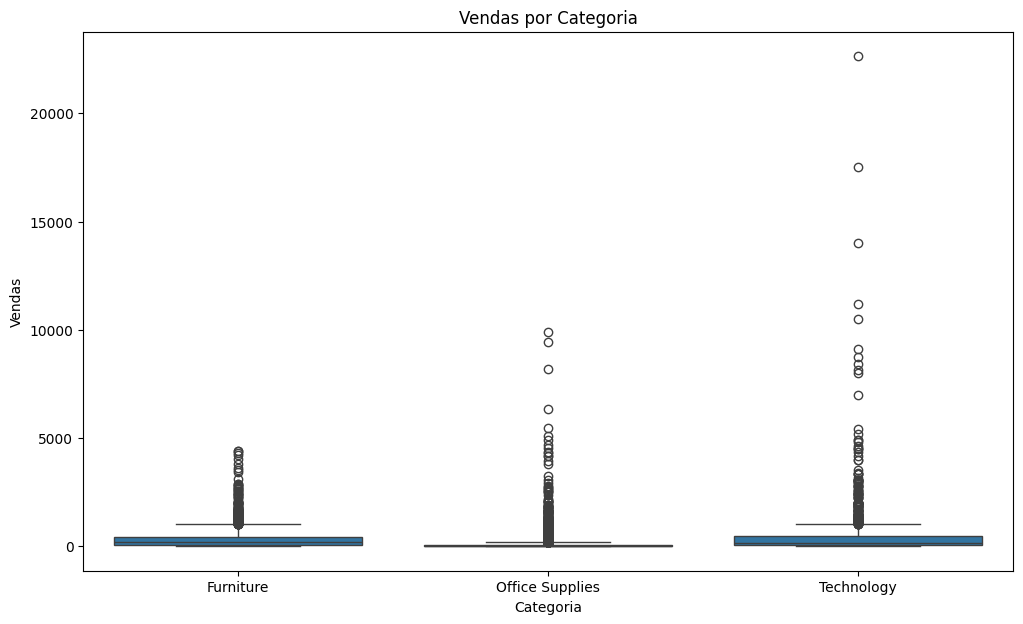

In [ ]:
# Análise Categórica para 'Category'
plt.figure(figsize=(12, 7))
sns.boxplot(x='Category', y='Sales', data=dados)
plt.title('Vendas por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Vendas')
plt.show()

A análise categórica das vendas por categoria, visualizada através do boxplot, oferece uma perspectiva valiosa sobre como as vendas se distribuem entre diferentes categorias de produtos. O gráfico revela variações significativas nas medianas de vendas, assim como na presença de outliers dentro de cada categoria. Isso indica que, embora certas categorias possam ter, em média, vendas mais altas ou mais baixas, todas elas apresentam casos de vendas excepcionalmente elevadas.

**Descoberta e Impacto**

Esta análise traz à tona a descoberta de que o desempenho de vendas varia substancialmente entre as categorias. Algumas categorias podem consistentemente gerar vendas mais altas, enquanto outras mostram uma propensão a vendas mais modestas, porém com oportunidades pontuais para vendas significativamente altas. A presença de outliers em todas as categorias sugere que, independentemente da média de vendas, existem produtos específicos ou circunstâncias de venda que podem levar a resultados excepcionais.

O impacto dessa descoberta é profundo e orienta várias estratégias potenciais:

**Otimização do Mix de Produtos:** Ajustar o mix de produtos para enfatizar as categorias com desempenho superior, ao mesmo tempo em que se explora o potencial de itens de alto valor nas categorias com vendas médias mais baixas.  
**Marketing e Promoções Direcionadas:** Desenvolver campanhas de marketing e promoções que se concentrem em categorias específicas, especialmente aquelas com potencial de alto retorno ou com histórico de outliers de vendas.  
**Análise de Preço e Produto:** Avaliar a estrutura de preços e a proposição de valor dos produtos em cada categoria para identificar oportunidades de otimização de preços ou de introdução de novos produtos que possam atender a demandas não satisfeitas.  
**Estudo de Comportamento do Cliente:** Investigar o comportamento de compra em diferentes categorias para entender as motivações por trás das escolhas dos consumidores, especialmente em casos de compras de alto valor.  
**Personalização da Experiência de Compra:** Utilizar dados de vendas para personalizar a experiência de compra, oferecendo recomendações de produtos baseadas nas preferências de categoria dos clientes e incentivando a exploração de categorias menos conhecidas.

Em conclusão, a descoberta de variações nas vendas por categoria ilumina o caminho para estratégias direcionadas que podem aumentar a receita geral. Compreender como diferentes categorias contribuem para o desempenho de vendas permite à superstore alavancar seus pontos fortes e abordar áreas de oportunidade, maximizando o potencial de cada segmento de produto.

**Vendas Por Subcategoria**

A análise das vendas por subcategoria é crucial para obter uma visão detalhada do desempenho de vendas dentro de subcategorias específicas. Esta análise permite identificar variações significativas nas vendas e destacar oportunidades para melhorar a estratégia de negócios.

Para visualizar essa distribuição, utilizamos um boxplot que revela a variabilidade nas medianas de vendas entre as subcategorias e a presença de outliers.

A seguir, apresentamos o código utilizado para gerar o boxplot, juntamente com o gráfico resultante:

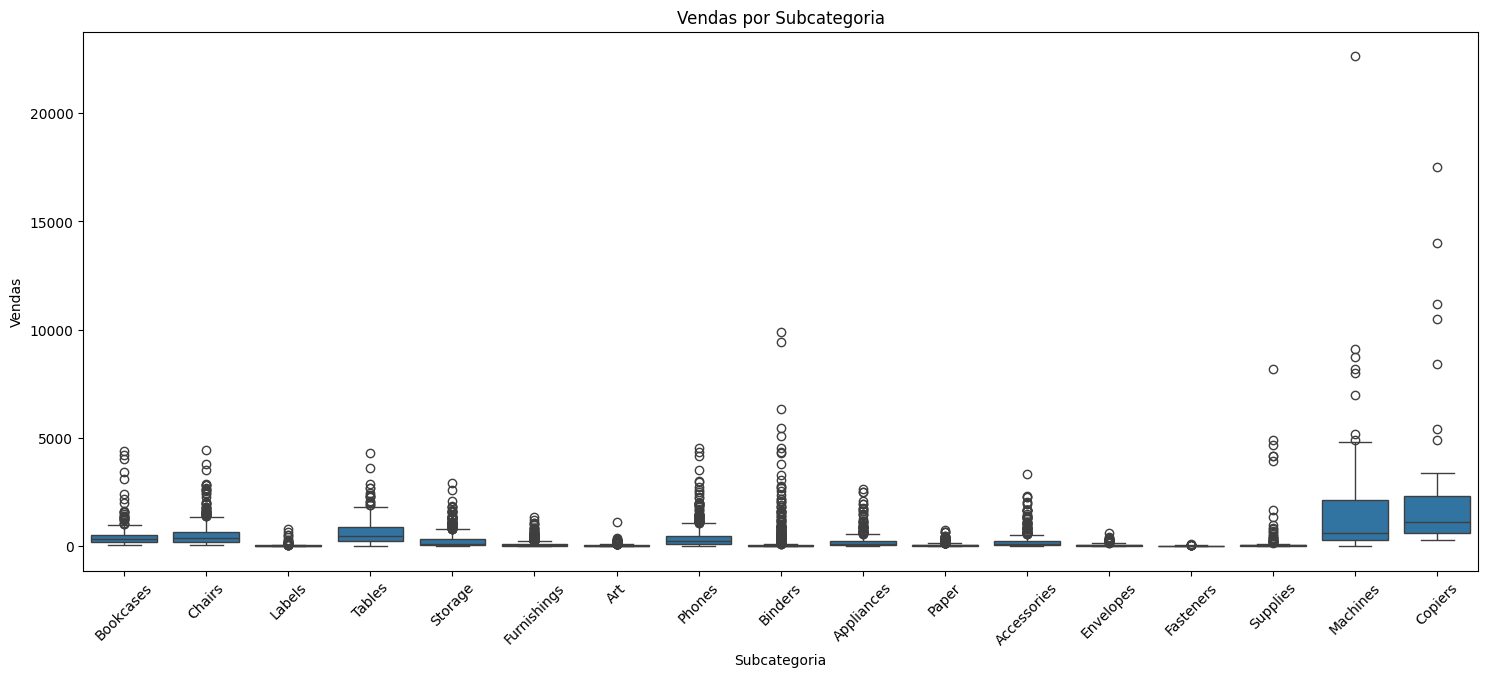

In [ ]:
# Análise Categórica para 'Sub_Category'
plt.figure(figsize=(18, 7))
sns.boxplot(x='Sub_Category', y='Sales', data=dados)
plt.title('Vendas por Subcategoria')
plt.xticks(rotation=45)  # Rotacionar os nomes das subcategorias para melhor visualização
plt.xlabel('Subcategoria')
plt.ylabel('Vendas')
plt.show()

A análise categórica das vendas por subcategoria, representada no boxplot, fornece uma visão detalhada e diferenciada do desempenho de vendas dentro de subcategorias específicas. Este gráfico destaca a variabilidade nas medianas de vendas entre as subcategorias e a presença de outliers, indicando que, assim como nas categorias gerais, existem diferenças significativas no desempenho de vendas das subcategorias.

**Descoberta e Impacto**

A descoberta chave aqui é a diversidade no desempenho de vendas entre as subcategorias, com algumas apresentando potencial de vendas significativamente maior do que outras. Além disso, a presença de outliers em várias subcategorias sugere oportunidades específicas de mercado ou eventos de vendas excepcionais que podem ser explorados para aumentar a receita.

O impacto desta descoberta orienta várias abordagens estratégicas:

**Foco em Subcategorias de Alto Desempenho:** Identificar e priorizar subcategorias com desempenho superior para otimização de estoque e promoções direcionadas, capitalizando sobre suas forças para impulsionar as vendas.  
**Análise de Outliers:** Investigar as vendas outliers em subcategorias específicas para entender as razões por trás desses picos de vendas, seja por demanda sazonal, promoções, ou lançamentos de produtos inovadores.  
**Diversificação de Produtos:** Explorar a expansão ou diversificação dentro de subcategorias que apresentam um potencial inexplorado, especialmente aquelas com um número significativo de vendas de alto valor.  
**Campanhas de Marketing Segmentadas:** Desenvolver e implementar campanhas de marketing que sejam altamente segmentadas para subcategorias específicas, visando aumentar a conscientização e a demanda por produtos dentro desses segmentos.  
**Personalização e Recomendação de Produtos:** Utilizar dados analíticos para criar experiências de compra personalizadas, recomendando produtos de subcategorias que correspondam aos interesses e ao histórico de compras dos clientes.

Em resumo, a análise detalhada das vendas por subcategoria desbloqueia insights valiosos sobre o comportamento do consumidor e as tendências de mercado. Ao entender como diferentes subcategorias contribuem para o desempenho geral de vendas, a superstore pode ajustar sua estratégia de produto, marketing e estoque para alavancar áreas de alto desempenho e abordar proativamente áreas com potencial de crescimento. Essa abordagem direcionada pode ajudar a otimizar as vendas, aumentar a satisfação do cliente e fortalecer a posição de mercado da superstore. ​

**Vendas por Segmento de Cliente**

A análise das vendas por segmento de cliente é essencial para entender como as vendas variam entre diferentes grupos de clientes. Esta análise permite identificar variações no comportamento de compra e adaptar estratégias para melhor atender a cada segmento.

Para visualizar essa distribuição, utilizamos um boxplot que revela a distribuição de vendas para cada segmento, incluindo "Consumer" (Consumidor), "Corporate" (Corporativo) e "Home Office" (Escritório em Casa).

A seguir, apresentamos o código utilizado para gerar o boxplot, juntamente com o gráfico resultante:

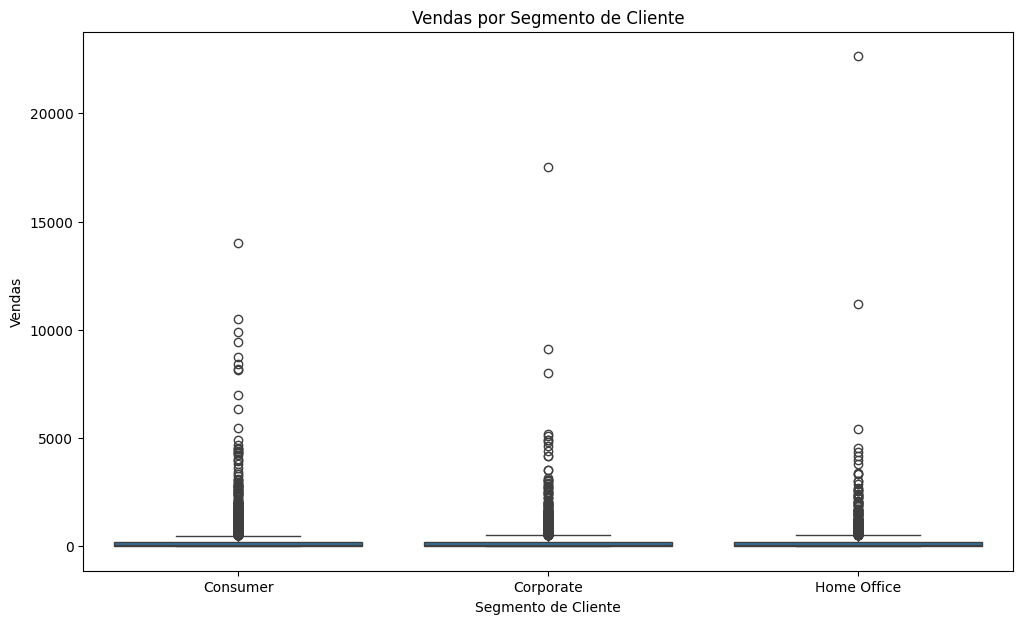

In [ ]:
# Análise de Segmentos de Clientes
plt.figure(figsize=(12, 7))
sns.boxplot(x='Segment', y='Sales', data=dados)
plt.title('Vendas por Segmento de Cliente')
plt.xlabel('Segmento de Cliente')
plt.ylabel('Vendas')
plt.show()

A análise das vendas por segmento de cliente, através do boxplot, proporciona uma visão clara de como as vendas variam entre diferentes segmentos de clientes. O gráfico mostra a distribuição de vendas para cada segmento, incluindo "Consumer" (Consumidor), "Corporate" (Corporativo) e "Home Office" (Escritório em Casa), revelando diferenças nas medianas de vendas e na presença de outliers.

**Descoberta e Impacto**

A descoberta fundamental desta análise é que existe uma variação no desempenho de vendas entre os diferentes segmentos de clientes, com cada um apresentando um perfil de vendas distinto. Isso sugere que os comportamentos de compra variam significativamente entre consumidores individuais, empresas e clientes de home office, influenciando o tipo e o valor dos produtos que eles adquirem.

O impacto dessa descoberta pode ser direcionado para várias estratégias chave:

**Estratégias de Vendas Personalizadas:** Desenvolver estratégias de vendas e marketing personalizadas para cada segmento de cliente, reconhecendo suas necessidades e comportamentos de compra únicos. Por exemplo, clientes corporativos podem ser mais receptivos a ofertas em volume ou soluções de negócios integradas, enquanto consumidores individuais podem valorizar promoções e produtos inovadores.  
**Foco no Serviço ao Cliente:** Ajustar o serviço ao cliente e o suporte de acordo com as expectativas e necessidades de cada segmento. Isso pode incluir personalização da comunicação, ofertas especiais para empresas ou soluções de compra facilitada para clientes de home office.  
**Análise de Produtos de Alto Valor:** Investigar as vendas de alto valor dentro de cada segmento para identificar produtos ou serviços que são particularmente populares ou rentáveis. Essas informações podem guiar o desenvolvimento de produtos e a gestão de estoque.  
**Promoções Segmentadas:** Criar promoções e ofertas que sejam especificamente direcionadas aos interesses e necessidades de cada segmento de cliente, aumentando a eficácia das campanhas de marketing e incentivando vendas adicionais.  
**Feedback e Melhoria Contínua:** Coletar feedback regular dos clientes em cada segmento para entender melhor suas experiências e ajustar a oferta de produtos, serviços e suporte de acordo com suas preferências.

Em conclusão, a análise das vendas por segmento de cliente revela a importância de entender as diferenças no comportamento de compra entre os segmentos. Adaptar as estratégias de vendas, marketing, e serviço ao cliente para atender às necessidades específicas de cada segmento pode levar a um aumento na satisfação do cliente, fidelidade e, por fim, um desempenho de vendas mais forte.

# Análise Temporal (Tendências e Sazonalidade das Vendas)

No contexto da análise de dados de vendas, é essencial entender as tendências e sazonalidade para identificar padrões e prever futuras necessidades. A análise temporal das vendas permite visualizar como as transações variam ao longo do tempo, destacando picos, quedas e possíveis padrões sazonais.

Para realizar essa análise, utilizamos um gráfico de linha que mostra as vendas totais mês a mês ao longo de vários anos. Este tipo de visualização é eficaz para identificar tendências de longo prazo, sazonalidade e períodos de alta e baixa demanda.

A seguir, apresentamos o código utilizado para gerar o gráfico de tendências e o gráfico resultante:

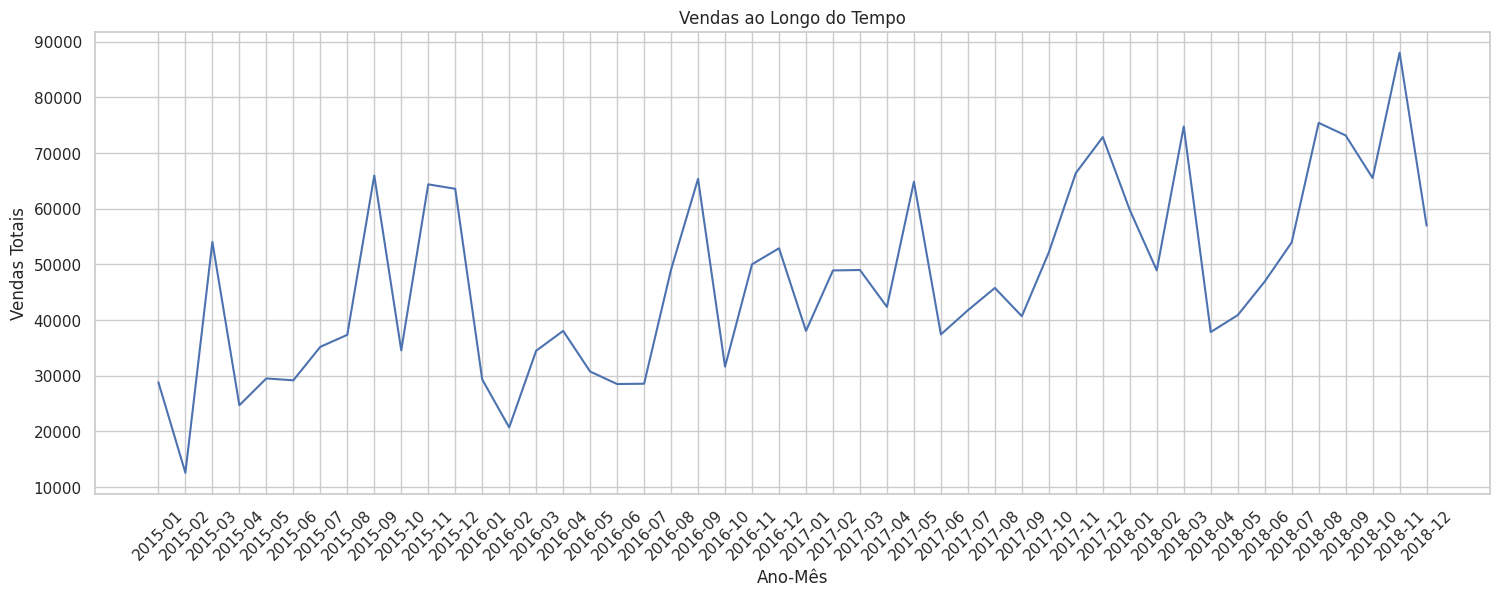

In [ ]:
# Converter 'Order_Date' para datetime
dados['Order_Date'] = pd.to_datetime(dados['Order_Date'], format='%d/%m/%Y')

# Criar colunas de ano e mês para análise temporal
dados['Year'] = dados['Order_Date'].dt.year
dados['Month'] = dados['Order_Date'].dt.month

# Agrupar dados por ano e mês para ver a tendência das vendas ao longo do tempo
vendas_temporais = dados.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Criar uma coluna 'Year_Month' para facilitar a plotagem
vendas_temporais['Year_Month'] = vendas_temporais['Year'].astype(str) + '-' + vendas_temporais['Month'].astype(str).str.zfill(2)

# Plotar as vendas ao longo do tempo
plt.figure(figsize=(18, 6))
sns.lineplot(data=vendas_temporais, x='Year_Month', y='Sales')
plt.xticks(rotation=45)
plt.title('Vendas ao Longo do Tempo')
plt.xlabel('Ano-Mês')
plt.ylabel('Vendas Totais')
plt.show()


A análise das vendas ao longo do tempo, visualizada através de um gráfico de linha, mostra as tendências de vendas totais mês a mês, abrangendo vários anos. Este gráfico fornece uma visão clara de como as vendas evoluíram, permitindo identificar padrões sazonais, picos de vendas e possíveis períodos de desaceleração.

**Descoberta e Impacto**

A descoberta principal desta análise é a variação temporal nas vendas, que pode ser influenciada por fatores sazonais, promoções, eventos de marketing ou mudanças no mercado. Observar essas tendências ao longo do tempo permite identificar períodos específicos do ano em que as vendas aumentam ou diminuem, o que é crucial para o planejamento estratégico da empresa.

O impacto dessa descoberta é significativo e orienta várias ações:

**Planejamento de Estoque:** Ajustar os níveis de estoque com base nas tendências sazonais para garantir que a superstore possa atender à demanda sem sofrer com excesso ou falta de produtos.  
**Campanhas de Marketing Temporais:** Planejar e implementar campanhas de marketing para coincidir com os períodos de alta demanda, maximizando o impacto das promoções e aumentando as vendas.  
**Preparação para Períodos de Baixa:** Identificar períodos de desaceleração nas vendas para implementar estratégias de retenção de clientes, como ofertas especiais ou novos lançamentos de produtos, para manter um fluxo de receita estável.  
**Análise de Tendências de Longo Prazo:** Monitorar as tendências de vendas ao longo de vários anos para entender as mudanças no comportamento do consumidor e no mercado, permitindo ajustes estratégicos no modelo de negócios da superstore.  
**Otimização da Força de Trabalho:** Alocar recursos humanos de acordo com as necessidades operacionais, aumentando a equipe durante períodos de pico e otimizando durante períodos mais lentos.

Em resumo, a análise temporal das vendas fornece insights valiosos para a tomada de decisões estratégicas em várias áreas do negócio. Entender como as vendas flutuam ao longo do tempo permite à superstore planejar de forma mais eficaz, aproveitar oportunidades de mercado, e mitigar desafios potenciais, contribuindo para o crescimento sustentável e a eficiência operacional.

# Análise Geográfica (Impacto da Localização nas Vendas)

No contexto da análise de vendas, a localização geográfica dos clientes pode ter um impacto significativo nos resultados. A análise geográfica das vendas permite identificar quais regiões contribuem mais significativamente para as vendas totais e onde podem existir oportunidades de crescimento ou áreas que requerem atenção estratégica.

Para realizar essa análise, utilizamos um gráfico de barras que mostra as vendas totais por estado. Esta visualização é essencial para entender a distribuição geográfica das vendas e identificar padrões regionais.

A seguir, apresentamos o código utilizado para gerar o gráfico de vendas por estado, juntamente com o gráfico resultante:

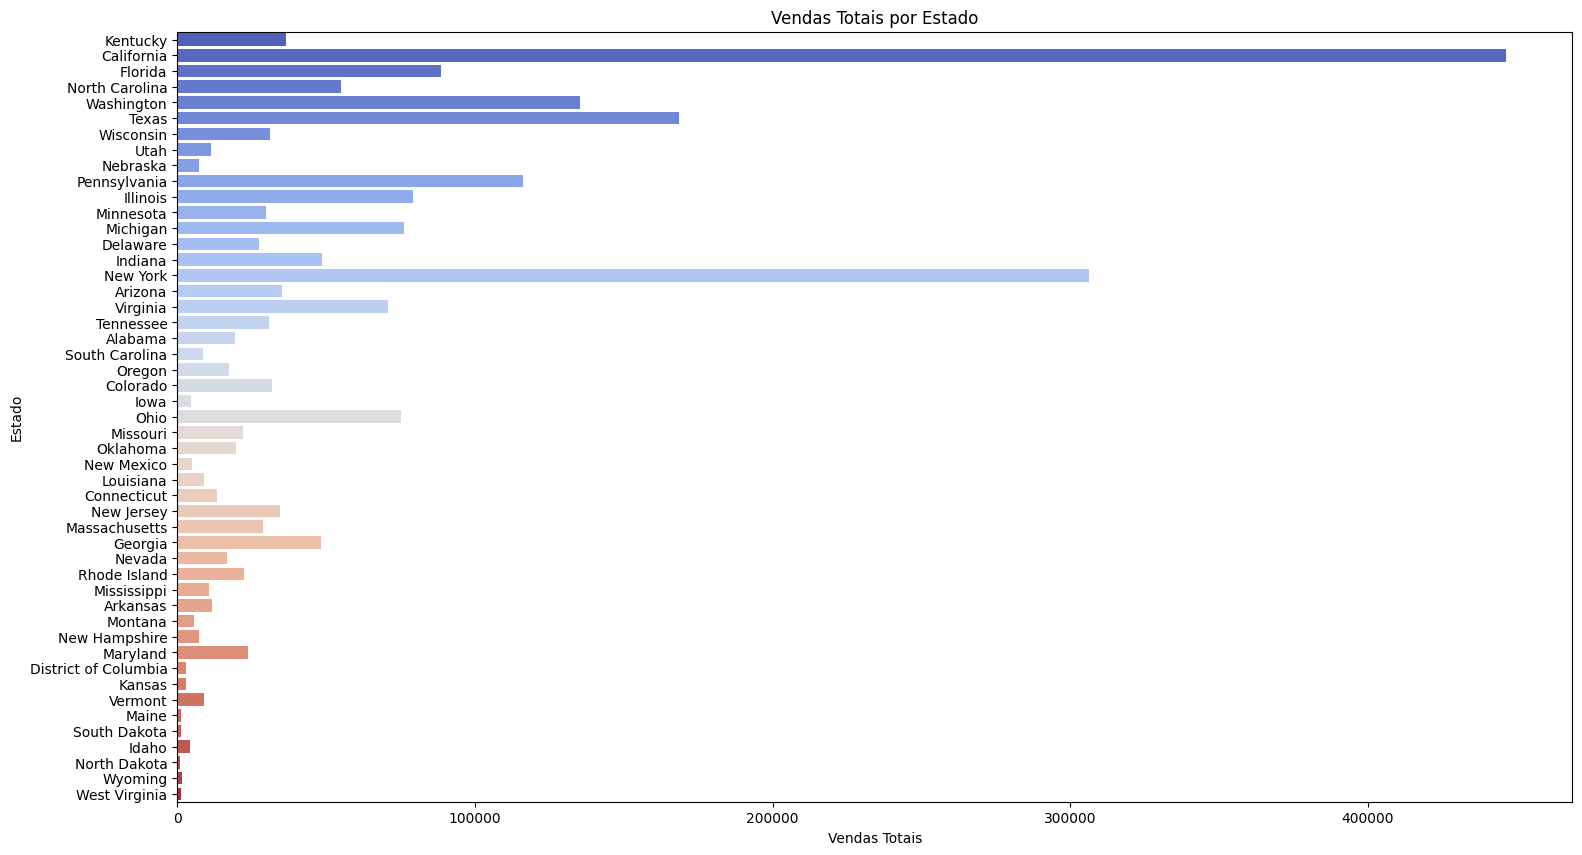

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    plt.figure(figsize=(18, 10))
    sns.barplot(data=dados, x='Sales', y='State', estimator=sum, errorbar=None,         palette="coolwarm")
    plt.title('Vendas Totais por Estado')
    plt.xlabel('Vendas Totais')
    plt.ylabel('Estado')
    plt.show()


O gráfico de barras ajustado mostra as vendas totais por estado, fornecendo uma visão clara de como as vendas se distribuem geograficamente. Este tipo de visualização é essencial para identificar quais estados contribuem mais significativamente para as vendas totais e onde podem existir oportunidades de crescimento ou áreas que requerem atenção estratégica.

**Descoberta e Impacto**

A principal descoberta desta análise é a variação significativa nas vendas totais entre os estados. Alguns estados se destacam como grandes contribuintes para as vendas totais, enquanto outros têm um desempenho relativamente menor. Esta variação pode ser influenciada por vários fatores, como a presença de clientes corporativos, diferenças econômicas regionais, ou a eficácia das estratégias de marketing locais.

O impacto dessa descoberta abrange várias áreas estratégicas:

**Foco Geográfico:** Direcionar recursos e esforços de marketing para estados com alto potencial de crescimento ou para aqueles que já demonstram um forte desempenho de vendas.  
**Análise de Mercado Regional:** Realizar uma análise mais profunda para entender as razões por trás do desempenho de vendas em diferentes estados, incluindo fatores econômicos, competitivos e de mercado.  
**Estratégias de Expansão:** Identificar estados com desempenho abaixo do esperado como oportunidades para estratégias de expansão ou melhorias operacionais.  
**Personalização de Ofertas:** Adaptar ofertas e promoções às particularidades de cada estado ou região, considerando suas características demográficas e econômicas específicas.  
**Otimização da Logística e da Distribuição:** Ajustar a logística e a distribuição para melhor atender às demandas regionais, maximizando a eficiência e a satisfação do cliente.

Em resumo, a análise das vendas totais por estado oferece insights valiosos para a tomada de decisão estratégica, permitindo à empresa alinhar suas operações, marketing e estratégias de expansão com as oportunidades e desafios específicos de cada região. Identificar áreas de forte desempenho e aquelas com potencial de crescimento pode ajudar a direcionar investimentos e esforços para maximizar o retorno sobre o investimento.

**Vendas Totais por Região**

A análise das vendas por região é crucial para entender como as vendas se distribuem geograficamente e identificar áreas de desempenho variado. Esta análise permite uma comparação direta do desempenho de vendas entre diferentes regiões, destacando quais contribuem mais significativamente para as vendas totais e onde podem existir oportunidades para aumentar as vendas ou melhorar o desempenho.

Para realizar essa análise, utilizamos um gráfico de barras que exibe as vendas totais por região. Esta visualização facilita a identificação de padrões regionais e a tomada de decisões estratégicas baseadas nesses padrões.

A seguir, apresentamos o código utilizado para gerar o gráfico de vendas por região, juntamente com o gráfico resultante:

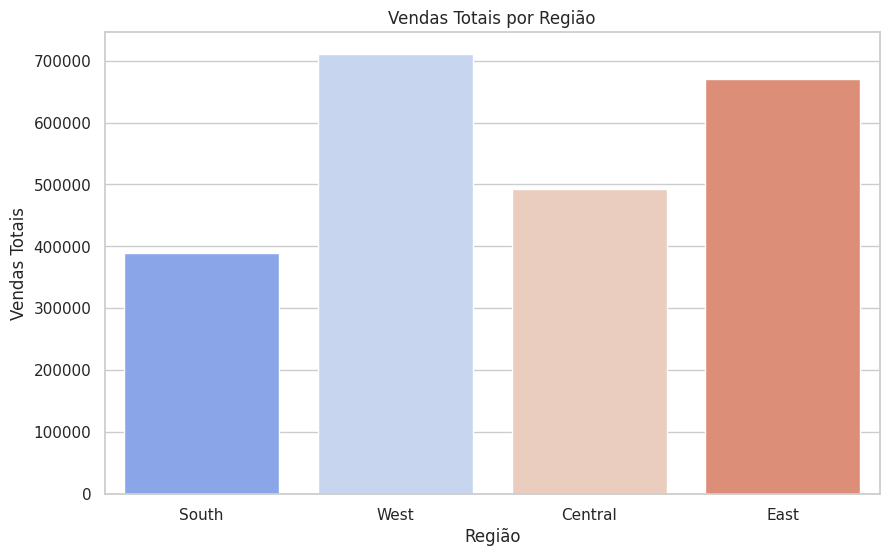

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    plt.figure(figsize=(10, 6))
    sns.barplot(data=dados, x='Region', y='Sales', estimator=sum, ci=None, palette="coolwarm")
    plt.title('Vendas Totais por Região')
    plt.xlabel('Região')
    plt.ylabel('Vendas Totais')
    plt.show()

O gráfico de barras exibe as vendas totais por região, destacando como as vendas se distribuem entre as diferentes regiões geográficas. Esta visualização facilita a comparação direta do desempenho de vendas entre regiões, identificando quais delas contribuem mais significativamente para as vendas totais e onde podem existir oportunidades para aumentar as vendas ou melhorar o desempenho.



**Descoberta e Impacto**

A análise revela variações no volume de vendas entre as regiões, indicando que algumas regiões têm um desempenho de vendas superior em comparação com outras. Esta descoberta sugere que fatores regionais específicos, como a densidade populacional, o poder aquisitivo, a presença de negócios e a eficácia das estratégias de marketing local, podem influenciar significativamente o desempenho de vendas.

O impacto dessa descoberta inclui várias considerações estratégicas:

**Estratégias de Marketing Regionalizadas:** Desenvolver e implementar estratégias de marketing que sejam personalizadas para atender às características e necessidades específicas de cada região, visando aumentar a penetração de mercado e o reconhecimento da marca.  
**Análise de Oportunidades de Crescimento:** Identificar regiões com desempenho inferior como áreas de oportunidade para crescimento, investigando as causas subjacentes do desempenho fraco e desenvolvendo planos de ação para abordá-las.  
**Ajustes na Distribuição e Logística:** Considerar ajustes na rede de distribuição e logística para melhor atender às regiões com maior demanda, otimizando os tempos de entrega e a satisfação do cliente.  
**Foco em Produtos Regionais:** Avaliar a oferta de produtos para garantir que atenda às preferências e demandas regionais, potencialmente introduzindo produtos específicos para regiões que apresentam características de mercado únicas.  
**Feedback e Engajamento do Cliente:** Promover iniciativas para coletar feedback e engajar clientes em diferentes regiões, a fim de entender melhor suas preferências e comportamentos de compra.

Em resumo, a análise das vendas totais por região fornece insights importantes sobre como as vendas variam geograficamente e destaca a importância de estratégias regionalizadas. Ao adaptar abordagens de marketing, produto, distribuição e serviço ao cliente às características específicas de cada região, a empresa pode melhorar o desempenho de vendas, aumentar a satisfação do cliente e fortalecer sua posição no mercado.

# Análise do Modo de Envio nas Vendas

A análise do modo de envio é fundamental para entender como diferentes opções de entrega impactam o volume total de vendas. Este tipo de análise permite identificar quais modos de envio são mais populares entre os clientes e como eles influenciam o desempenho de vendas.

Para realizar essa análise, utilizamos um gráfico de barras que apresenta as vendas totais por modo de envio. A paleta de cores "viridis" ajuda a destacar visualmente as diferenças entre os modos de envio, facilitando a comparação e a análise do impacto de cada opção no desempenho de vendas.

A seguir, apresentamos o código utilizado para gerar o gráfico de vendas por modo de envio, juntamente com o gráfico resultante:

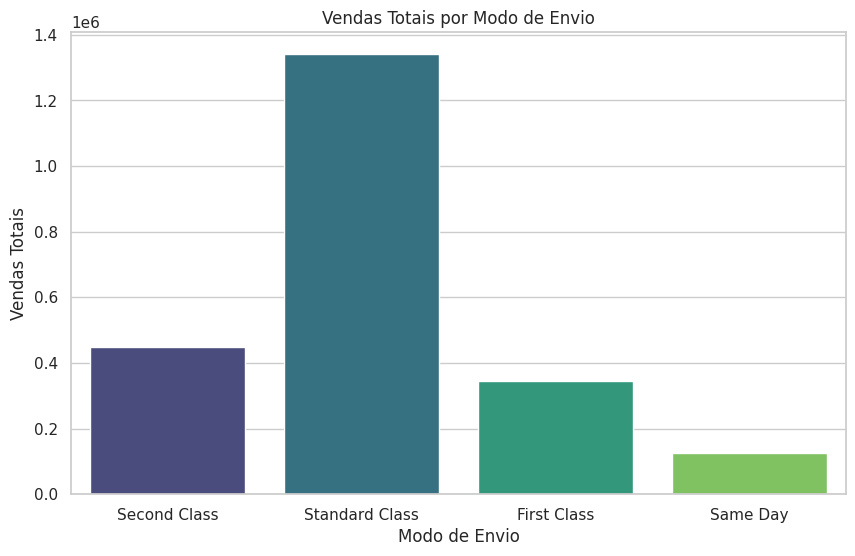

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    plt.figure(figsize=(10, 6))
    sns.barplot(data=dados, x='Ship_Mode', y='Sales', estimator=sum, ci=None, palette="viridis")
    plt.title('Vendas Totais por Modo de Envio')
    plt.xlabel('Modo de Envio')
    plt.ylabel('Vendas Totais')
    plt.show()


O gráfico de barras apresenta as vendas totais por modo de envio, ilustrando como diferentes opções de envio contribuem para o volume total de vendas. A paleta de cores "viridis" ajuda a destacar visualmente as diferenças entre os modos de envio, facilitando a comparação e a análise do impacto de cada opção no desempenho de vendas.

**Descoberta e Impacto**

Esta análise revela variações significativas nas vendas totais associadas a diferentes modos de envio. Isso sugere que as preferências dos clientes por opções de envio específicas, talvez influenciadas por fatores como custo, velocidade e conveniência, podem afetar diretamente o volume de vendas.

O impacto dessa descoberta abrange várias áreas estratégicas:

**Estratégias de Preços e Promoções de Envio:** Revisar as estratégias de precificação e promoções para os diferentes modos de envio, com o objetivo de incentivar comportamentos de compra que se alinhem com os objetivos de negócio da empresa, como aumentar o tamanho médio dos pedidos ou melhorar as margens de lucro.  
**Otimização da Logística de Envio:** Avaliar e otimizar a logística associada a cada modo de envio para maximizar a eficiência e a satisfação do cliente, o que pode incluir negociar melhores taxas de envio com fornecedores de serviços de logística ou melhorar a precisão nas estimativas de entrega.  
**Marketing e Comunicação:** Desenvolver campanhas de marketing e materiais de comunicação que destaquem os benefícios dos modos de envio preferenciais dos clientes, potencialmente aumentando a lealdade do cliente e incentivando repetições de compra.  
**Análise de Custos e Benefícios:** Realizar uma análise detalhada dos custos e benefícios associados a cada modo de envio, considerando tanto o impacto nos custos operacionais quanto nas preferências e satisfação do cliente.  
**Personalização da Experiência de Compra:** Explorar oportunidades para personalizar a experiência de compra, oferecendo aos clientes a opção de escolher o modo de envio que melhor atenda às suas necessidades específicas, possivelmente através de interfaces de compra mais intuitivas ou ofertas de envio personalizadas.  

Em resumo, a análise das vendas totais por modo de envio destaca a importância de compreender as preferências dos clientes e o impacto dessas preferências nas vendas. Adaptar estratégias de envio, logística, marketing e preços para atender às expectativas dos clientes pode levar a um aumento no volume de vendas, melhorar a eficiência operacional e aumentar a satisfação e fidelidade do cliente.

# Análise de Produtos

A análise de produtos mais vendidos é essencial para entender quais itens geram mais receita para a empresa. Identificar os produtos líderes de vendas permite obter insights valiosos sobre as preferências dos clientes, as tendências de mercado e o desempenho de produtos específicos.

Para realizar essa análise, utilizamos um gráfico de barras que mostra os top 10 produtos mais vendidos por receita total. A paleta de cores "mako" proporciona uma visualização clara e atraente, facilitando a identificação dos produtos que mais contribuem para as vendas totais.

A seguir, apresentamos o código utilizado para gerar o gráfico dos produtos mais vendidos, juntamente com o gráfico resultante:

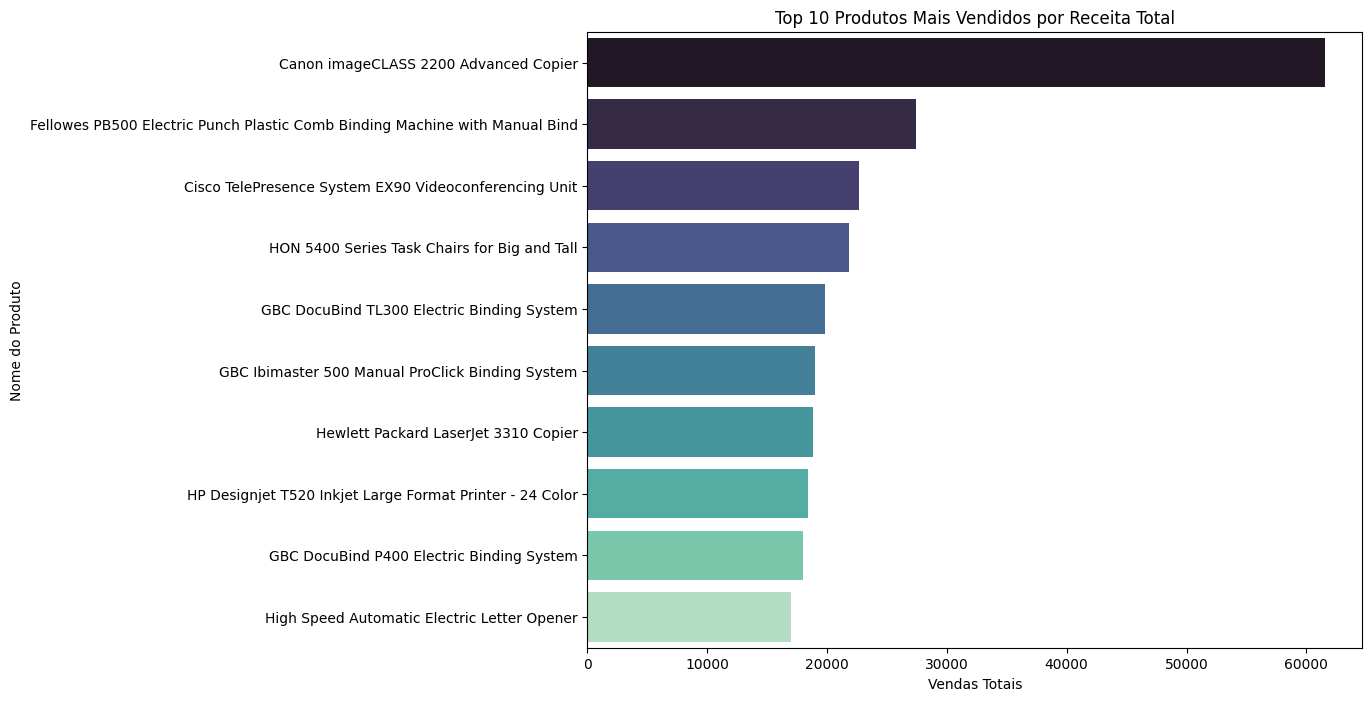

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    produtos_top_vendas = dados.groupby('Product_Name')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()

    plt.figure(figsize=(10, 8))
    sns.barplot(data=produtos_top_vendas, y='Product_Name', x='Sales', palette="mako")
    plt.title('Top 10 Produtos Mais Vendidos por Receita Total')
    plt.xlabel('Vendas Totais')
    plt.ylabel('Nome do Produto')
    plt.show()

O gráfico de barras mostra os top 10 produtos mais vendidos por receita total, destacando os itens que geraram mais vendas para a empresa. A paleta de cores "mako" proporciona uma visualização clara e atraente, facilitando a identificação dos produtos líderes de vendas.

**Descoberta e Impacto**

Esta análise destaca os produtos que são mais valiosos para a empresa em termos de geração de receita. A identificação dos produtos mais vendidos oferece insights valiosos sobre as preferências dos clientes, tendências de mercado e o desempenho de produtos específicos.

O impacto dessa descoberta abrange diversas estratégias potenciais:

**Foco em Produtos de Alto Desempenho:** Priorizar o estoque, a promoção e a visibilidade dos produtos mais vendidos para maximizar a receita. Isso pode incluir alocar mais recursos de marketing para esses produtos ou oferecer incentivos para vendas cruzadas e upselling.  
**Análise de Margem de Lucro:** Avaliar as margens de lucro dos produtos mais vendidos para garantir que eles não apenas gerem altas vendas, mas também contribuam positivamente para a lucratividade geral.  
**Desenvolvimento de Produtos:** Utilizar os insights obtidos a partir dos produtos mais vendidos para informar o desenvolvimento de novos produtos, buscando replicar o sucesso ao alinhar novas ofertas com as características desejadas pelos clientes.  
**Gerenciamento de Estoque e Supply Chain:** Ajustar a gestão de estoque e a cadeia de suprimentos para garantir a disponibilidade contínua dos produtos mais vendidos, minimizando o risco de rupturas de estoque que possam impactar as vendas.  
**Feedback e Melhoria Contínua:** Coletar feedback dos clientes sobre os produtos mais vendidos para identificar áreas de melhoria e oportunidades para aumentar a satisfação do cliente e fortalecer a lealdade à marca.

Em resumo, a identificação dos produtos mais vendidos fornece uma base sólida para a tomada de decisões estratégicas em várias áreas do negócio. Concentrar-se em produtos que já demonstraram sucesso no mercado pode ajudar a otimizar as receitas, melhorar a satisfação do cliente e informar o desenvolvimento de produtos futuros, garantindo que a empresa continue competitiva e relevante no mercado.

**Distribuição de Vendas na Região West por Estado**

A análise da distribuição de vendas por estado dentro de uma região específica é essencial para entender onde a empresa tem maior impacto e onde existem oportunidades de crescimento. Identificar a região com o maior volume de vendas e detalhar a contribuição de cada estado dentro dessa região oferece insights valiosos sobre o desempenho geográfico.

Para realizar essa análise, utilizamos um gráfico de barras que mostra a distribuição de vendas entre os estados na região West, que é a região com o maior volume de vendas.

A seguir, apresentamos o código utilizado para gerar o gráfico, juntamente com o gráfico resultante:

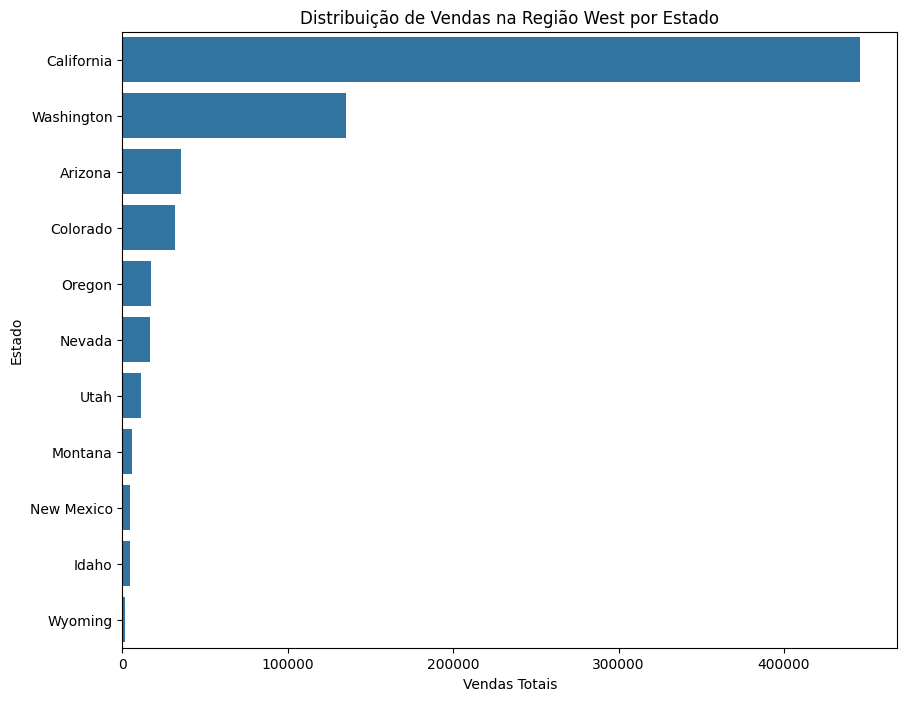

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupando dados por Região e somando as Vendas
region_sales = dados.groupby('Region')['Sales'].sum().reset_index()

# Ordenando valores para encontrar a região com as maiores vendas
region_sales_sorted = region_sales.sort_values(by='Sales', ascending=False)

# Obtendo a região com as maiores vendas
top_region = region_sales_sorted.iloc[0]['Region']

# Filtrando o conjunto de dados para a região de maior venda
df_top_region = dados[dados['Region'] == top_region]

# Para fins de demonstração, vamos visualizar a distribuição de vendas entre os estados dentro da região de maior venda usando um gráfico de barras.
state_sales = df_top_region.groupby('State')['Sales'].sum().sort_values(ascending=False).reset_index()

# Criando o gráfico
plt.figure(figsize=(10, 8))
sns.barplot(x='Sales', y='State', data=state_sales)
plt.title(f'Distribuição de Vendas na Região {top_region} por Estado')
plt.xlabel('Vendas Totais')
plt.ylabel('Estado')
plt.show()


O gráfico de barras mostra a distribuição de vendas entre os estados dentro da região com o maior volume de vendas. Este visual destaca os estados que contribuem mais significativamente para as vendas totais nessa região, permitindo uma análise detalhada de onde a empresa tem o maior impacto e onde pode existir espaço para crescimento ou melhoria.

**Descoberta e Impacto**

Identificar a região com o maior volume de vendas e analisar a contribuição de cada estado dentro dessa região traz à tona insights valiosos sobre o desempenho geográfico. Esta análise pode revelar mercados-chave que são vitais para o sucesso da empresa, assim como áreas com potencial inexplorado.

O impacto dessa descoberta inclui várias abordagens estratégicas:

**Foco em Mercados de Alto Desempenho:** Direcionar recursos adicionais, como marketing e suporte de vendas, para os estados com o maior volume de vendas, a fim de maximizar o sucesso nesses mercados.  
**Análise de Oportunidades de Crescimento:** Investigar os estados dentro da região de maior venda que têm um desempenho relativamente mais baixo para entender as barreiras ao crescimento e desenvolver estratégias específicas para superá-las.  
**Estratégias de Expansão Regional:** Considerar a expansão ou intensificação das operações nos estados de alto desempenho para aproveitar ao máximo as oportunidades de mercado existentes.  
**Personalização de Ofertas e Serviços:** Adaptar ofertas, produtos e serviços para atender às necessidades e preferências específicas dos clientes em estados de alto desempenho, aumentando a satisfação e a lealdade do cliente.  
**Análise Competitiva:** Avaliar o panorama competitivo nos estados de maior venda para garantir que a empresa mantenha uma vantagem competitiva forte e identificar áreas para inovação e diferenciação.

Em resumo, compreender a distribuição de vendas por estado dentro da região de maior volume de vendas fornece uma base sólida para decisões estratégicas direcionadas. Isso permite à empresa focar em áreas de força, identificar e abordar desafios em mercados específicos e otimizar estratégias para impulsionar o crescimento e a eficiência.

# Considerações Finais


1. **Tendências Temporais**: A análise de vendas ao longo do tempo identificou padrões sazonais e tendências de crescimento, destacando períodos de pico que podem estar associados a feriados ou promoções específicas. Essa compreensão é crucial para planejar estratégias de estoque e marketing.
2. **Influência Geográfica:** A localização demonstrou ter um impacto significativo nas vendas, com variações notáveis entre diferentes estados e regiões. Essas diferenças podem refletir a base de clientes, o poder aquisitivo local e a presença de competidores, sugerindo a necessidade de estratégias de marketing e preços regionalizadas.
3. **Modos de Envio:** A preferência dos clientes por determinados modos de envio influencia as vendas, indicando a importância de oferecer opções de envio flexíveis e eficientes que atendam às expectativas dos consumidores em termos de custo e rapidez.
4. **Desempenho de Produtos:** A análise revelou os produtos mais vendidos e sua contribuição para as vendas totais, enfatizando a importância de focar em itens líderes de vendas para otimização de estoque e ações de marketing direcionado.




# Recomendações

* **Estratégias Sazonais:** Desenvolver campanhas de marketing e promoções alinhadas com as tendências sazonais identificadas para maximizar as vendas durante os períodos de pico.  
* **Adaptação Regional:** Personalizar a oferta de produtos e estratégias de preços para atender às particularidades de cada região, visando aumentar a penetração no mercado e a satisfação do cliente.
* **Flexibilidade no Envio:** Expandir e diversificar as opções de envio para melhorar a satisfação do cliente e atender às suas preferências, potencialmente aumentando as vendas.
* **Foco em Produtos Chave:** Priorizar produtos líderes de vendas na gestão de estoque e planejamento de marketing para otimizar a lucratividade.

# Relatorio final

O relatório final do projeto "Análise de Vendas de Supermercado" oferece uma exploração detalhada e insights valiosos sobre o desempenho de vendas de um supermercado, utilizando um conjunto de dados disponibilizado publicamente no Kaggle. Este estudo abrangente incluiu várias análises focadas em aspectos críticos do negócio, como tendências temporais, influência geográfica, modos de envio e desempenho de produtos específicos. A seguir, são apresentadas as principais considerações finais do projeto.

# Referências Bibliográficas

1. Estatística e Análise de Dados:  
* **Data Science for Business: What You Need to Know about Data Mining and Data-Analytic Thinking** por Foster Provost e Tom Fawcett. Este livro oferece uma introdução compreensiva à ciência de dados no contexto empresarial, ideal para entender as aplicações práticas da análise de dados nas vendas e no varejo.

2. Ciência de Dados e Machine Learning:
*  **Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython** por Wes McKinney. Focado nas ferramentas de Python para análise de dados, este livro é essencial para quem utilizou Pandas e outras bibliotecas de Python no projeto.  
* **Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems** por Aurélien Géron. Uma referência prática para aplicar técnicas de machine learning, incluindo análises preditivas que podem ser úteis para previsão de vendas.

3. Gestão de Varejo e Marketing:
* **Retail Marketing Management** por David Gilbert. Este livro aborda princípios fundamentais de marketing e gestão específicos para o setor de varejo, oferecendo insights sobre como melhorar as estratégias de vendas baseadas nas análises de dados.  
*  **Consumer Behavior: Buying, Having, and Being** por Michael R. Solomon. Uma obra profunda sobre o comportamento do consumidor, essencial para entender as motivações por trás das tendências de vendas identificadas na análise.

# Documentação de Software e Bibliotecas

* Documentação Oficial do Pandas: https://pandas.pydata.org/docs/user_guide/index.html
* Documentação Oficial do Matplotlib: https://matplotlib.org/stable/index.html
* Documentação Oficial do Seaborn: https://seaborn.pydata.org/
* Documentação Oficial do Warnings: https://docs.python.org/3/library/warnings.html